In [3]:
import glob, os
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi']= 200

#files = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log/data/*')
files = glob.glob('data/*')

frequencies = {}
fre_volts = {}

for f in files:
    if not 'backup' in f:
        filename = os.path.split(f)[1]
        voltage = float(filename.split('@')[0])
        frequency = float(filename.split('@')[1].split('.txt')[0])
        
        with open(f,'r') as opened:
            lines = opened.readlines()
            for line in lines:
                if len(line) == 0: continue
                key = line.split(':(')[0][1:-2]
                bins = int(key.split(',')[0])
                #prominence = int(key.split(',')[1])
                value = line.split(':(')[1]
                #voltage = float(filename.split('@')[0])
                #frequency = float(filename.split('@')[1].split('.txt')[0])
                if frequency == 0.00:
                    print(filename)
                    print(line)
                gain = float(value.split(',')[0])
                error = float(value.split(',')[1][:-2])
                if not frequency in list(fre_volts.keys()): fre_volts[frequency] = []
                if voltage in fre_volts[frequency]:
                    print(f'Voltage {voltage} for {frequency} already exists')
                fre_volts[frequency].append(voltage)
                if not frequency in list(frequencies.keys()): frequencies[frequency] = []
                frequencies[frequency].append((voltage, (gain,error,bins)))

                #plt.scatter([voltage],[gain],30,c='red',marker='*')
    #plt.clf()
                
frequencies_un = np.unique(list(frequencies.keys()))
print(frequencies_un)
#with open(f'{voltage}@{frequency}.txt','w') as f:

[ 0.5  0.6  0.7  0.8  0.9  1.   2.   5.   7.  10. ]


(30.0, (627.2471458361131, 0.01356623176101744, 9))
30.0@7.0 -> 627.2471458361131 and 0.01356623176101744
(30.2, (681.4786629458845, 0.01480367361712168, 5))
30.2@7.0 -> 681.4786629458845 and 0.01480367361712168
(30.4, (734.7563285896622, 0.00552599348673836, 5))
30.4@7.0 -> 734.7563285896622 and 0.00552599348673836
(30.6, (786.3460465845455, 0.01900880575411726, 5))
30.6@7.0 -> 786.3460465845455 and 0.01900880575411726
(30.8, (840.4168124996684, 0.0264290877503813, 5))
30.8@7.0 -> 840.4168124996684 and 0.0264290877503813
(31.0, (889.4966967620167, 0.018135033277167, 5))
31.0@7.0 -> 889.4966967620167 and 0.018135033277167
(31.2, (940.7627389487952, 0.0415926767606341, 11))
31.2@7.0 -> 940.7627389487952 and 0.0415926767606341
(31.4, (992.8401929051273, 0.0138441668431882, 5))
31.4@7.0 -> 992.8401929051273 and 0.0138441668431882
(31.6, (1044.763723304809, 0.0340445361261896, 7))
31.6@7.0 -> 1044.763723304809 and 0.0340445361261896
(31.8, (1099.3413230119565, 0.006852983583155271, 25))
31

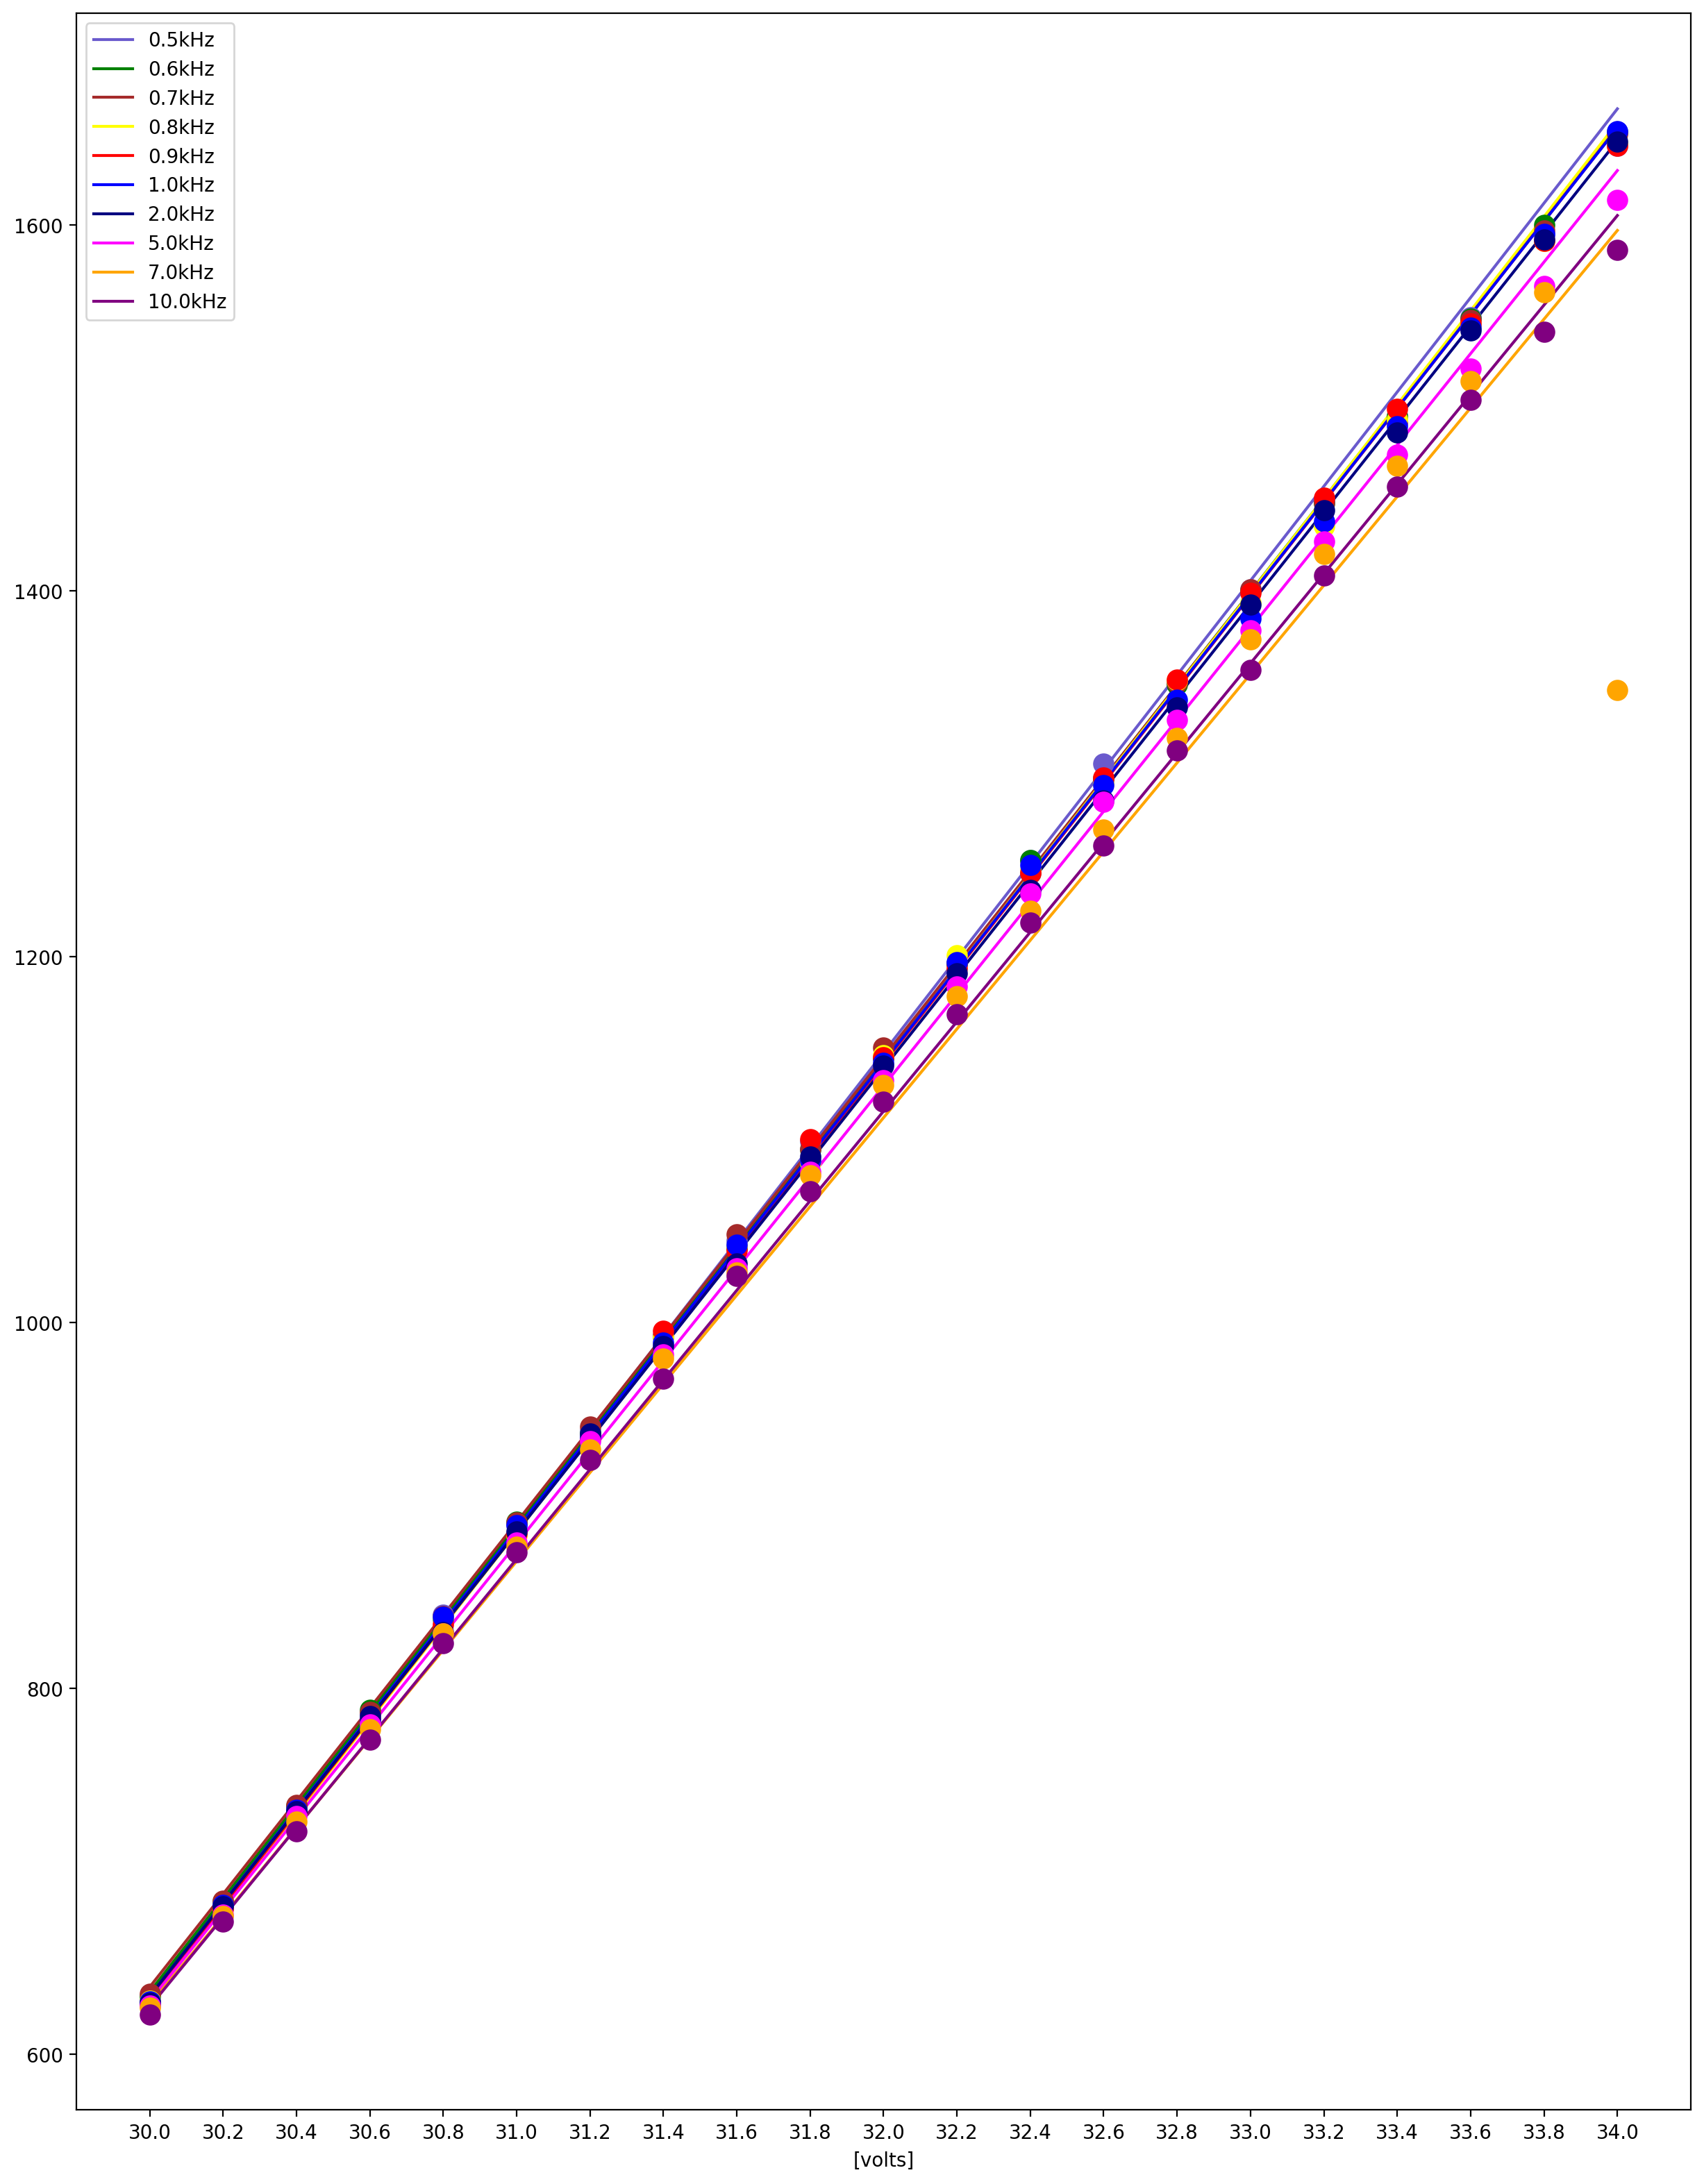

In [4]:
colors = ['slateblue', 'green', 'brown', 'yellow', 'red', 'blue', 'navy','magenta','orange','purple']
def line(x,a,b): return a*(x-b)
plt.figure(facecolor='white',figsize=(15,20))
for ii, freq in enumerate(frequencies_un):
    values = frequencies[freq]
    color = colors[ii]
    voltages = []
    gains = []
    errors = []
    for value in values:
        print(value)
        voltage, data_val = value
        gain, error, bins = data_val
        #if freq == 10.0 and voltage < 31.8: continue
        #if freq == 7.0 and voltage < 31.0: continue
        #if freq == 5.0 and voltage < 30.4: continue
        #if voltage == 32.4: gain = 578*5
        if voltage in voltages:
            index = np.argwhere(np.asarray(voltages) == voltage)[0][0]
            old_err = errors[index]
            if gains[index] == gain: continue
            print(f'{voltage} already looped',end=' ')
            print(f'OLD GAIN {gains[index]} vs new {gain}')
            if error > old_err:
                print(f'{error} > {old_err} --> SKIPPED')
                continue
            else:
                gains[index] = gain
                errors[index] = error
                print(f'{error} < {old_err} --> REBASED')
                continue
        voltages.append(voltage)
        gains.append(gain)
        errors.append(error)
        print(f'{voltage}@{frequency} -> {gain} and {error}')
    if len(gains) == 0:
        print(freq,' : ',voltage)
        print(values)

    plt.errorbar(voltages,gains,yerr=errors,fmt='o',ms=10,color=color)
    popt,pcov = curve_fit(line,voltages,gains,sigma=errors,maxfev=1000000)
    plt.plot(voltages,line(voltages,*popt),color=color,label=str(freq)+'kHz')
    print(f'{freq:.02f}kHz ->  {popt[0]:.5f} ± {np.sqrt(np.abs(np.diag(pcov)))[1]:.5f}      ({color})')
    plt.xticks(np.unique(voltages))
    
plt.legend(loc='upper left')
plt.xlabel('[volts]')
#plt.savefig(r'/Users/Tizi/Desktop/plotter.png')
plt.show()